In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact
from bokeh.plotting import figure, show, output_notebook, save, output_file
from bokeh.models import Range1d, HoverTool, ColumnDataSource, Text
import bokeh.io
bokeh.io.reset_output() # ultra important not to overcrowd the export
output_notebook(bokeh.resources.INLINE)  # enable bokeh to run inline in Jupyter

Loading BokehJS ...

# Load necessary data 

In [2]:
X = np.array(np.load("./final_X_25krandomwords.npy")).astype(float)
X_fischerLDA = np.array(np.load("./X_fischerLDA.npy")).astype(float)
X_tsne = np.array(np.load("./X_tsne.npy")).astype(float)
X_pca = np.array(np.load("./X_pca.npy")).astype(float)
raw_data = pd.read_csv("../data/raw_data.csv", index_col=0)

In [3]:
X_pca.shape, X_tsne.shape, X_fischerLDA.shape

((14194, 2), (14194, 2), (14194, 2))

In [4]:
to_theme = {0: "life science", 
            1: "mechanics", 
            2: "",
            3: "", 
            4: "materials", 
            5: "", 
            6: "", 
            7: "materials", 
            8: "electricity",  
            9: "", 
            10: "chemistry", 
            11: "information", 
            12: "optics",
            13: "",
            14: "",
            15: "transport",
            16: "thermodynamics", 
            17: "chemistry",
            18: "",
            19: "",
            20: "",
            21: "",
            22: "",
            23: "",
            24: "materials",
            25: "chemistry",
            26: "chemistry",
            27: "",
            28: "mechanics",
            29: "electricity"
           }
nonnull_idx = [i for (i,t) in list(to_theme.items()) if t]
nonnull_topics = [t for (i,t) in list(to_theme.items()) if t]
to_theme = dict(enumerate(nonnull_topics))
a = 14178
b = 14194

# Visualize with Bokeh

In [6]:
def visualize_per_year_lda(year):

    TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,previewsave,box_select,poly_select, hover"
    
    
    # create the figure
    p = figure(tools=TOOLS, plot_width=700, plot_height=500, min_border=10, min_border_left=50,
               toolbar_location="above", x_axis_location=None, y_axis_location=None,
               x_range=Range1d(-7, 0), y_range=Range1d(-6,-2),
              title= "Patents in {y}\n".format(y=year))
    
    #Range1d(-10, 6), y_range=Range1d(-9,11)
    
    p.background_fill_color = "#fafafa"
    
    # add text
    text_source = ColumnDataSource({'year': ['%s' % year]})
    text = Text(x=-3.5, y=-6, text='year', text_font_size='90pt', text_color='#EEEEEE')
    p.add_glyph(text_source, text)
    
    #x=-4, y=0
    
    # slice data for current year
    indices = raw_data.year.isin([year])
    indices = [i for i,boo in enumerate(indices) if boo]
    X_tmp = X_fischerLDA[[indices]]

    # plot all dots
    source = ColumnDataSource(data=dict(
            x=X_tmp[:,0],
            y=X_tmp[:,1],
            qualifier=["Patent abstract"]*X_tmp.shape[0],
            content=[s[:80] for s in raw_data[raw_data.year == year].abstract.values]
        ))
    p.scatter('x', 'y', source=source, color="#dddddd", legend="Patent abstracts in "+str(year))

    # plot the years avg
    source = ColumnDataSource(data=dict(
            x=[np.mean(X_tmp[:,0])],
            y=[np.mean(X_tmp[:,1])],
            qualifier=["Year's average patent"],
            content=["This dot represents the average of all abstracts. It essentially captures what's the overall \
                     topic extracted in abstracts of that year."]
        ))
    p.scatter('x', 'y', source=source, color="red", size=20, alpha=.5, marker="circle_x", legend="Year's average patent")

    # plot the topic centroids
    source = ColumnDataSource(data=dict(
            x=X_fischerLDA[a:b,0],
            y=X_fischerLDA[a:b,1],
            qualifier=["Topic center"]*(b-a),
            content=list(to_theme.values())
        ))

    p.scatter('x', 'y', source=source, color="green", 
              size=30, alpha=1, marker="cross", legend="Topic center")
    
    # manage hovers
    hover = p.select_one(HoverTool)
    hover.point_policy = "follow_mouse"
    hover.tooltips = [
        ("Type", "@qualifier"),
        ("Content", "@content")
    ]
    
    #save(p, "./../data/topics/{y}.html".format(y=year))
    return show(p)

In [7]:
#for year in range(1960,2015):
#    visualize_per_year_lda(year)

In [9]:
interact(visualize_per_year_lda, year=(1964,2015,1))

In [9]:
def visualize_per_year_tsne(year):

    TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select,poly_select, hover, undo, redo"
    
    
    # create the figure
    p = figure(tools=TOOLS, plot_width=700, plot_height=700, min_border=10, min_border_left=50,
               toolbar_location="above", x_axis_location=None, y_axis_location=None)
               #x_range=Range1d(-10, 6), y_range=Range1d(-9,11))
    
    p.background_fill_color = "#fafafa"
    
    # add text
    text_source = ColumnDataSource({'year': ['%s' % year]})
    text = Text(x=-4, y=0, text='year', text_font_size='120pt', text_color='#EEEEEE')
    p.add_glyph(text_source, text)
    
    # slice data for current year
    indices = raw_data.year.isin([year])
    indices = [i for i,boo in enumerate(indices) if boo]
    X_tmp = X_tsne[[indices]]

    # plot all dots
    source = ColumnDataSource(data=dict(
            x=X_tmp[:,0],
            y=X_tmp[:,1],
            qualifier=["patent abstract"]*X_tmp.shape[0],
            content=[s[:80] for s in raw_data[raw_data.year == year].abstract.values]
        ))
    p.scatter('x', 'y', source=source, color="red", legend="patent abstracts in "+str(year))

    # plot the years avg
    source = ColumnDataSource(data=dict(
            x=[np.mean(X_tmp[:,0])],
            y=[np.mean(X_tmp[:,1])],
            qualifier=["year's average patent"],
            content=[""]
        ))
    p.scatter('x', 'y', source=source, color="red", size=20, alpha=.5, marker="circle_x", legend="year's average patent")

    # plot the topic centroids
    source = ColumnDataSource(data=dict(
            x=X_tsne[a:b,0],
            y=X_tsne[a:b,1],
            qualifier=["topic center"]*(b-a),
            content=list(to_theme.values())
        ))

    p.scatter('x', 'y', source=source, color="green", 
              size=20, alpha=.7, marker="cross", legend="topic center")
    
    # manage hovers
    hover = p.select_one(HoverTool)
    hover.point_policy = "follow_mouse"
    hover.tooltips = [
        ("Type", "@qualifier"),
        ("Content", "@content")
    ]
    

    return show(p)

In [10]:
X_tsne.shape, X_fischerLDA.shape

((14194, 2), (14194, 2))

In [11]:
X_tsne[:,1]

array([  4.60762197e-04,  -4.32592107e-04,   9.40045854e-04, ...,
         3.01044556e-04,   3.27228533e-05,  -6.22275250e-04])

In [12]:
interact(visualize_per_year_tsne, year=(1970,2015,1))

<function __main__.visualize_per_year_tsne>

In [13]:
def visualize_per_year_pca(year):

    TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select,poly_select, hover, undo, redo"
    
    
    # create the figure
    p = figure(tools=TOOLS, plot_width=700, plot_height=700, min_border=10, min_border_left=50,
               toolbar_location="above", x_axis_location=None, y_axis_location=None)
               #x_range=Range1d(-10, 6), y_range=Range1d(-9,11))
    
    p.background_fill_color = "#fafafa"
    
    # add text
    text_source = ColumnDataSource({'year': ['%s' % year]})
    text = Text(x=-4, y=0, text='year', text_font_size='120pt', text_color='#EEEEEE')
    p.add_glyph(text_source, text)
    
    # slice data for current year
    indices = raw_data.year.isin([year])
    indices = [i for i,boo in enumerate(indices) if boo]
    X_tmp = X_pca[[indices]]

    # plot all dots
    source = ColumnDataSource(data=dict(
            x=X_tmp[:,0],
            y=X_tmp[:,1],
            qualifier=["patent abstract"]*X_tmp.shape[0],
            content=[s[:80] for s in raw_data[raw_data.year == year].abstract.values]
        ))
    p.scatter('x', 'y', source=source, color="#dddddd", legend="patent abstracts in "+str(year))

    # plot the years avg
    source = ColumnDataSource(data=dict(
            x=[np.mean(X_tmp[:,0])],
            y=[np.mean(X_tmp[:,1])],
            qualifier=["year's average patent"],
            content=[""]
        ))
    p.scatter('x', 'y', source=source, color="red", size=20, alpha=.5, marker="circle_x", legend="year's average patent")

    # plot the topic centroids
    source = ColumnDataSource(data=dict(
            x=X_pca[a:b,0],
            y=X_pca[a:b,1],
            qualifier=["topic center"]*(b-a),
            content=list(to_theme.values())
        ))

    p.scatter('x', 'y', source=source, color="green", 
              size=20, alpha=.7, marker="cross", legend="topic center")
    
    # manage hovers
    hover = p.select_one(HoverTool)
    hover.point_policy = "follow_mouse"
    hover.tooltips = [
        ("Type", "@qualifier"),
        ("Content", "@content")
    ]
    

    return show(p)

In [14]:
interact(visualize_per_year_pca, year=(1970,2015,1))

In [15]:
plt.style.use("ggplot")

In [18]:
def heatmap_(year):
    import numpy as np
    import numpy.random
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(15,15))
    #fig.patch.set_facecolor("#440154")
    plt.rcParams['axes.facecolor'] = '#ffffff'
    plt.rcParams['figure.facecolor'] = '#ffffff'
    
    # Generate some test data
    indices = raw_data.year.isin([year])
    indices = [i for i,boo in enumerate(indices) if boo]
    X_tmp = X_fischerLDA[[indices]]
    x = X_tmp[:,0]
    y = X_tmp[:,1]

    heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.imshow(heatmap.T, extent=extent, origin='lower')
    plt.ylim([-8,3])
    plt.xlim([-8,0])
    plt.savefig("./../data/heatmap/{0}.png".format(year))
    #plt.show()

/Users/janvier/anaconda/envs/ada/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


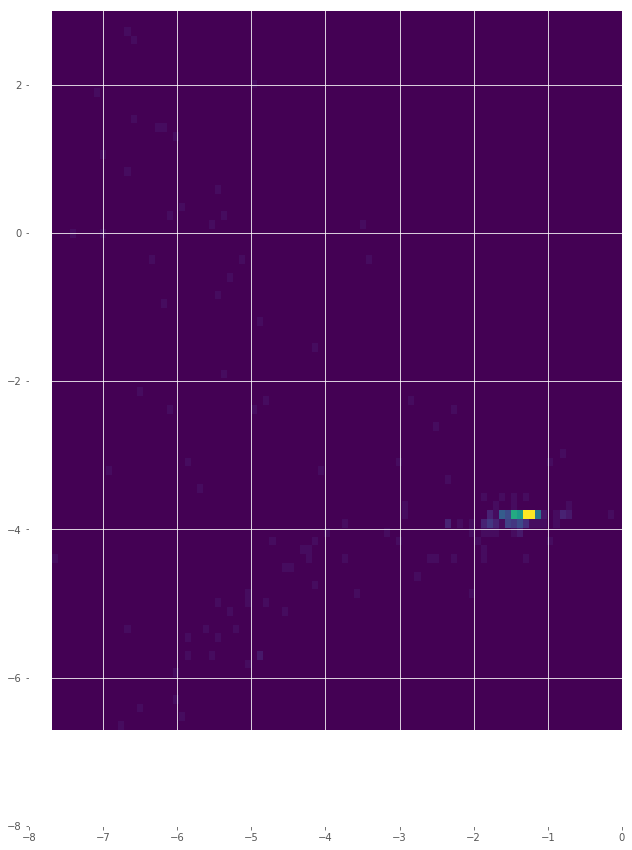

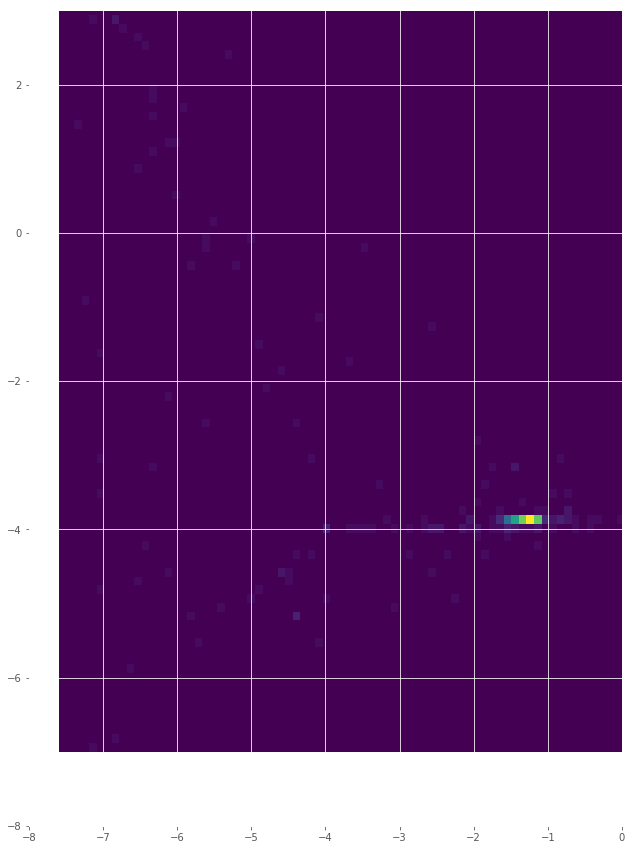

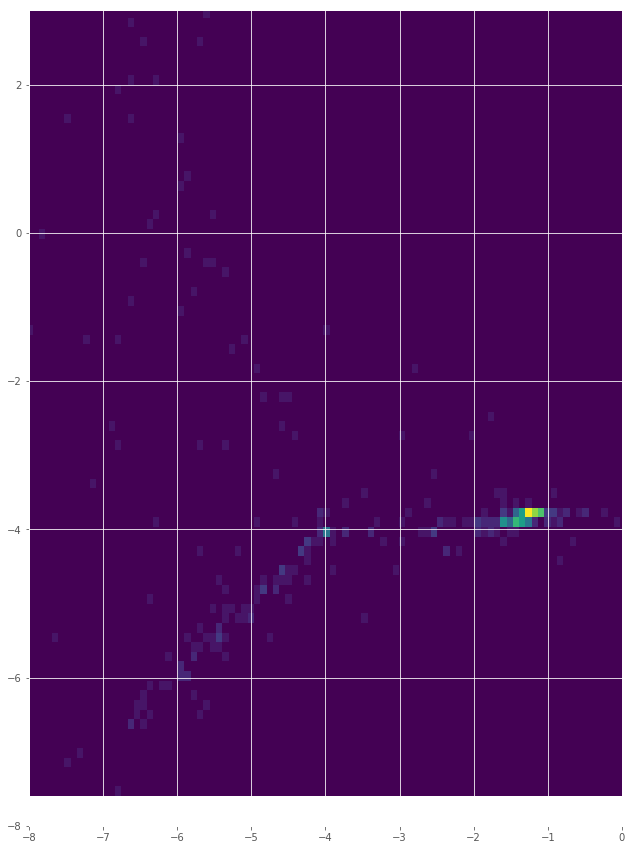

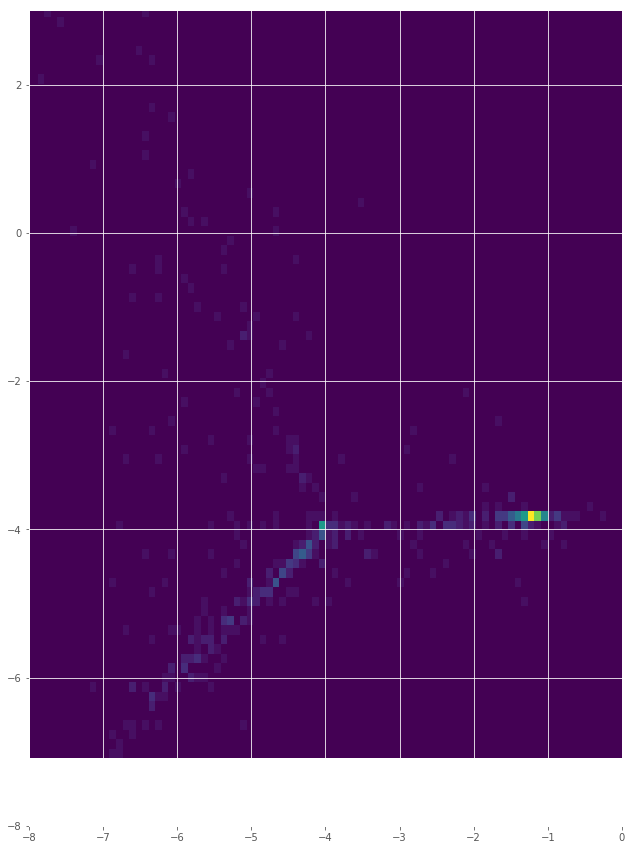

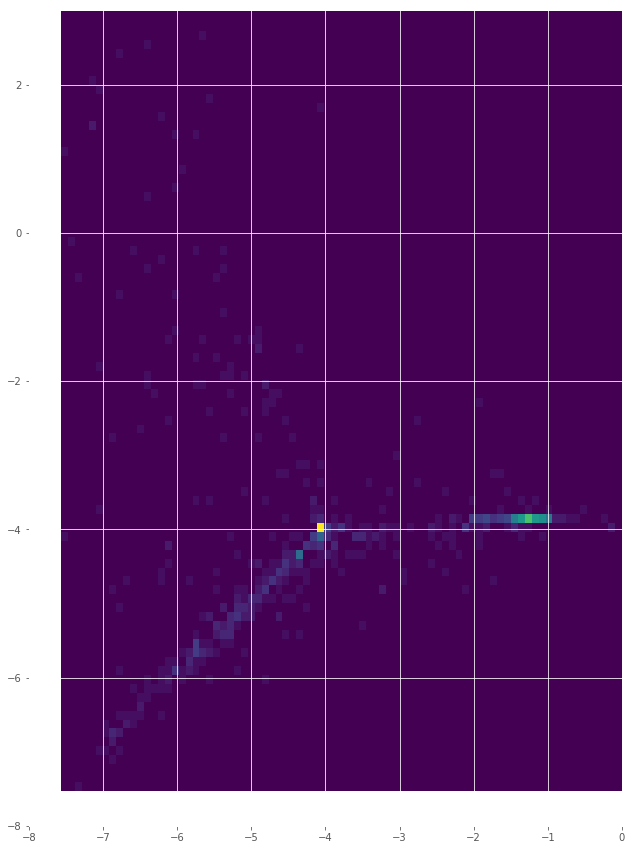

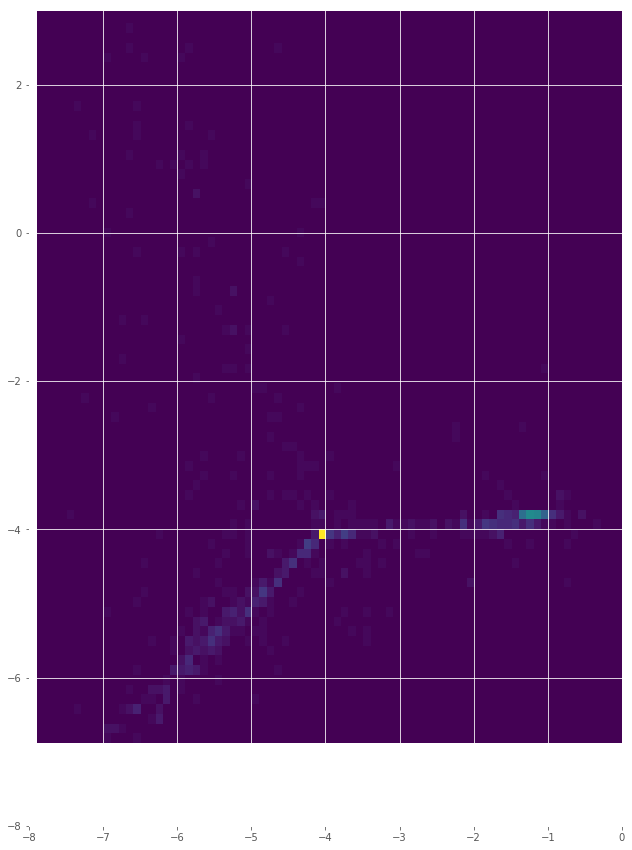

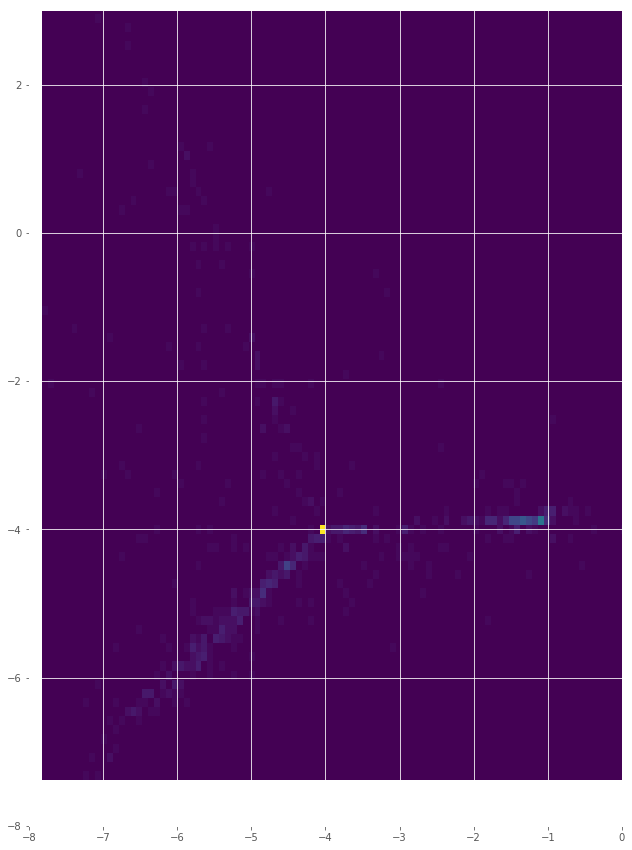

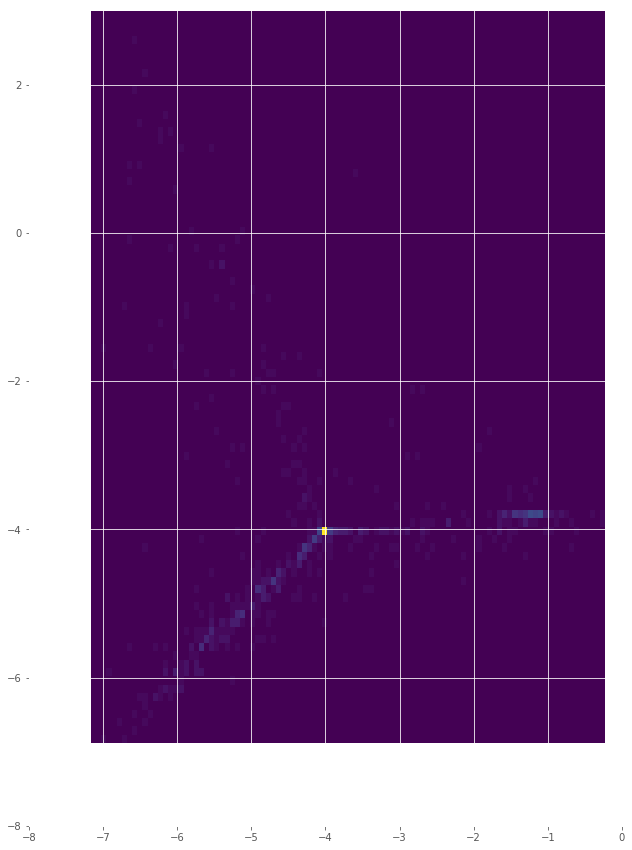

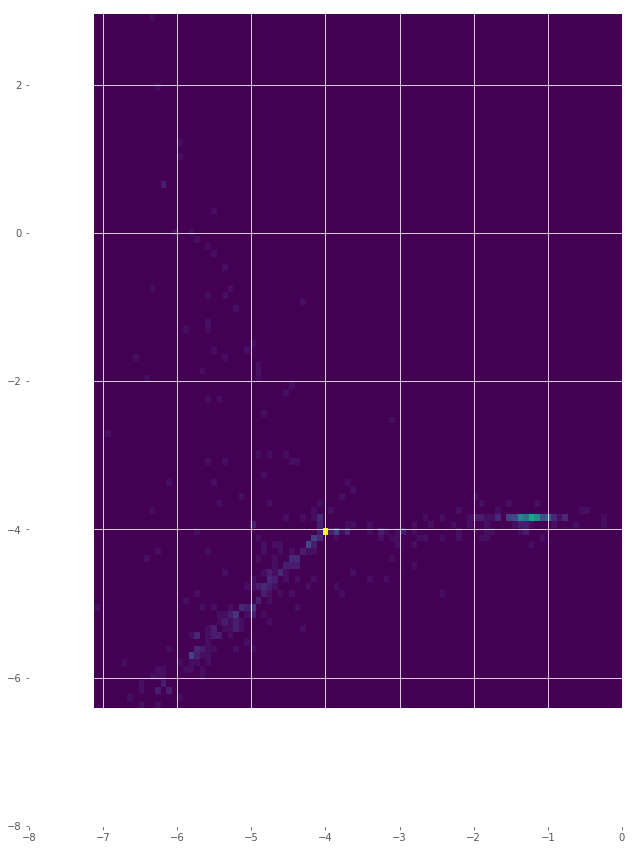

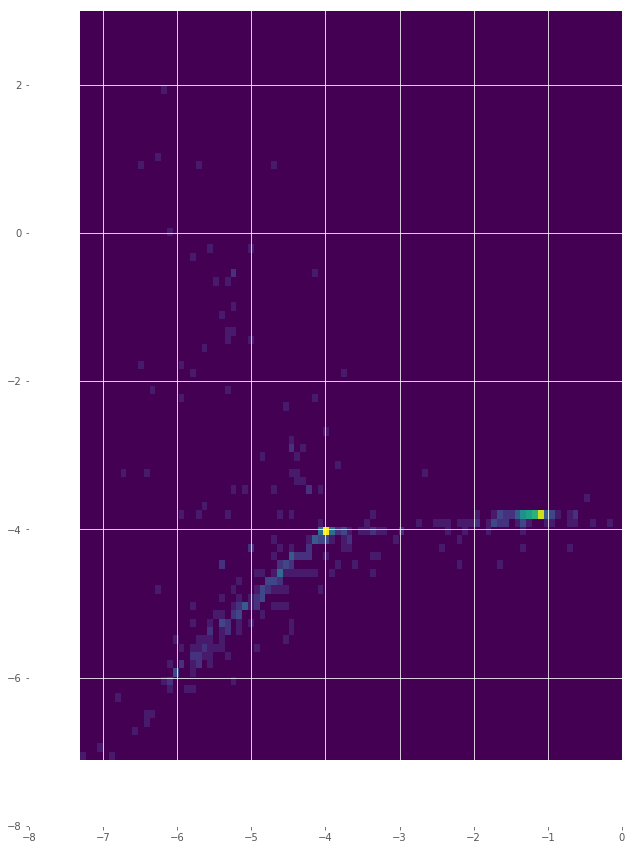

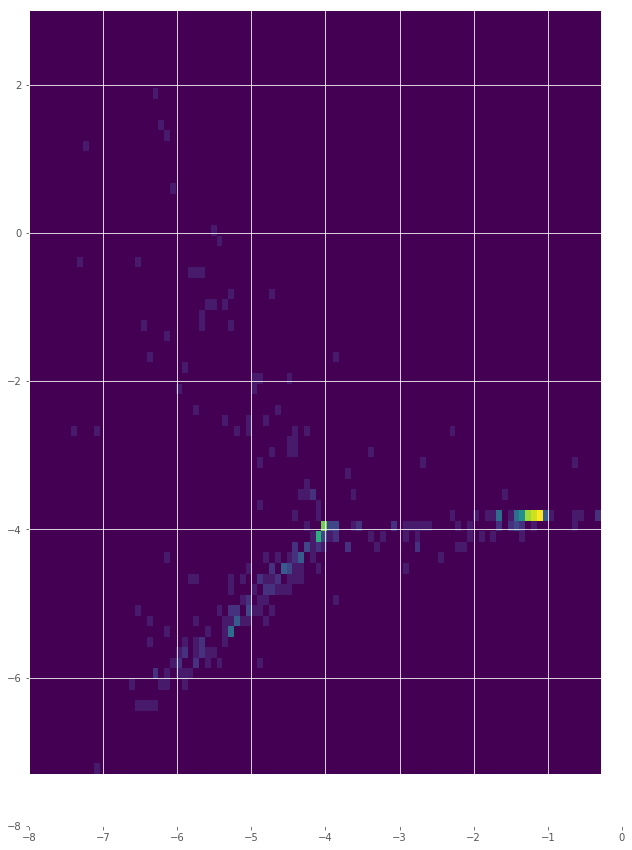

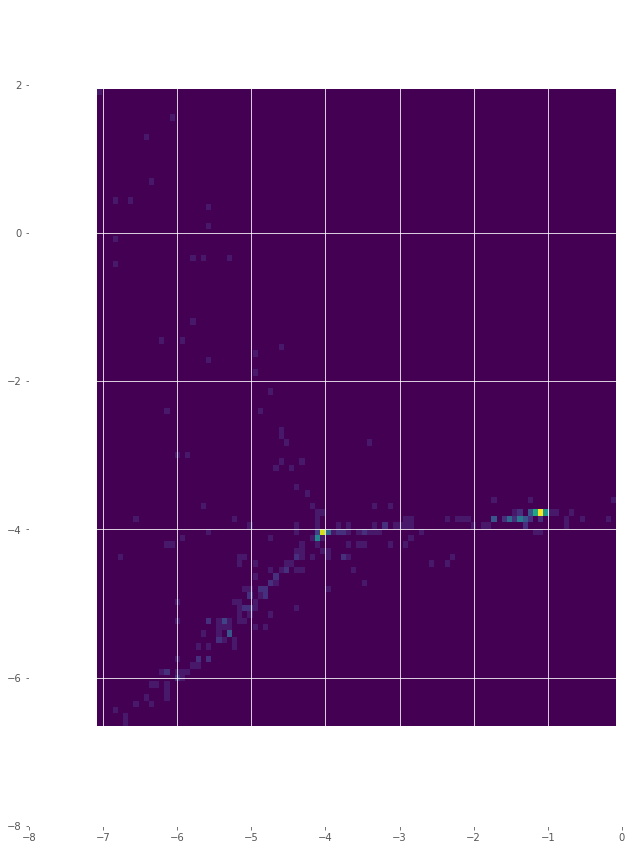

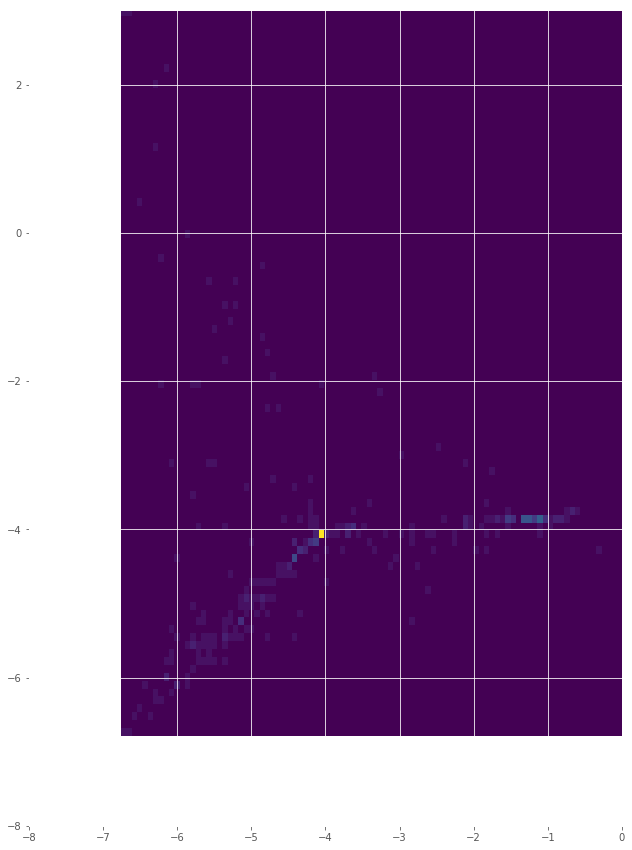

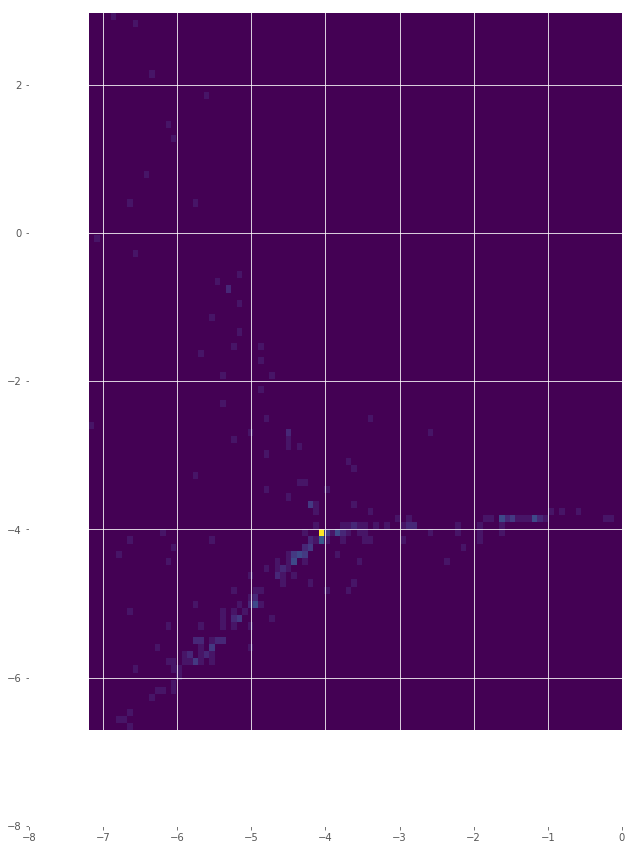

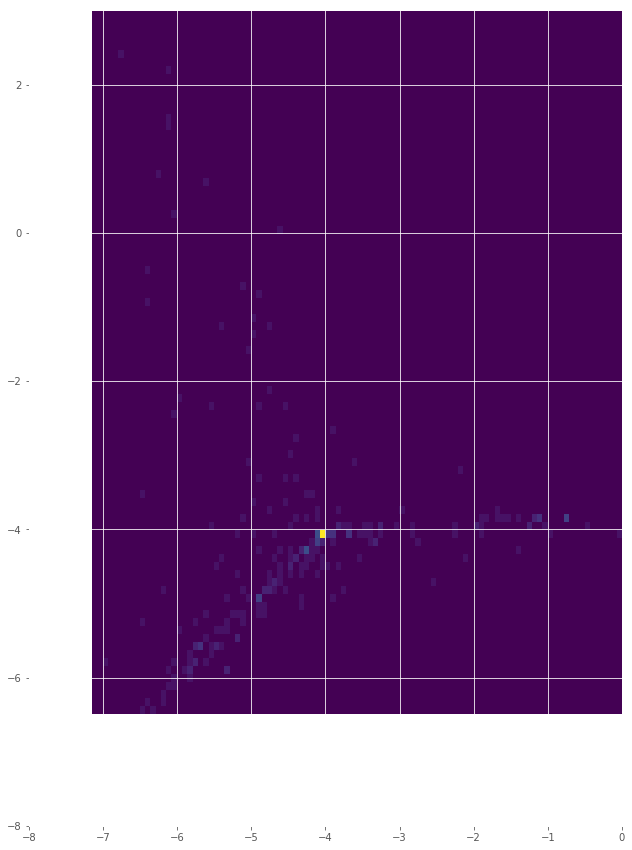

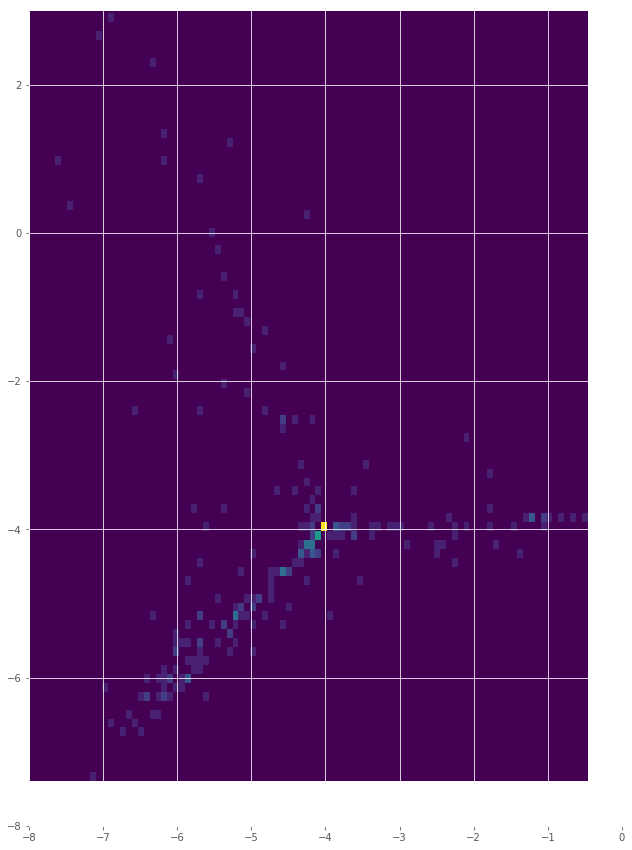

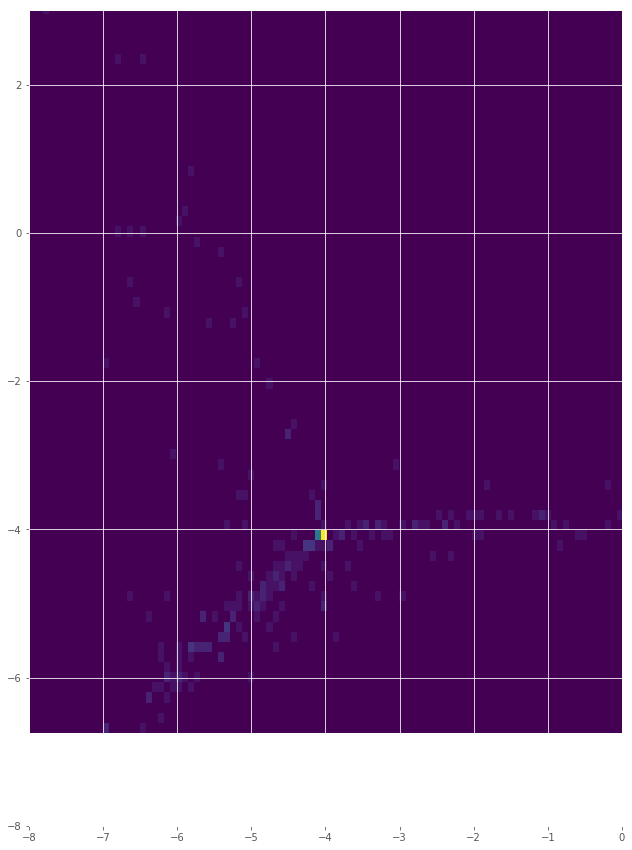

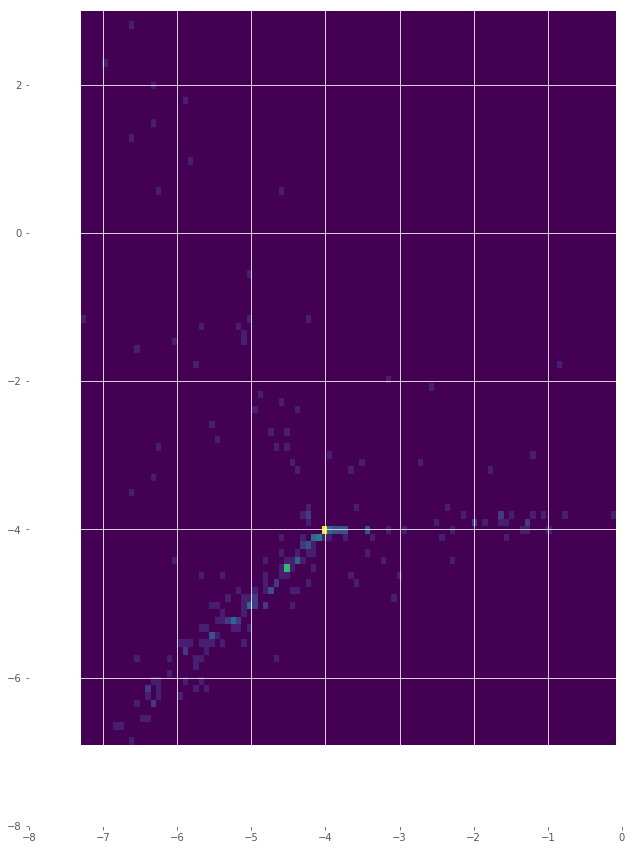

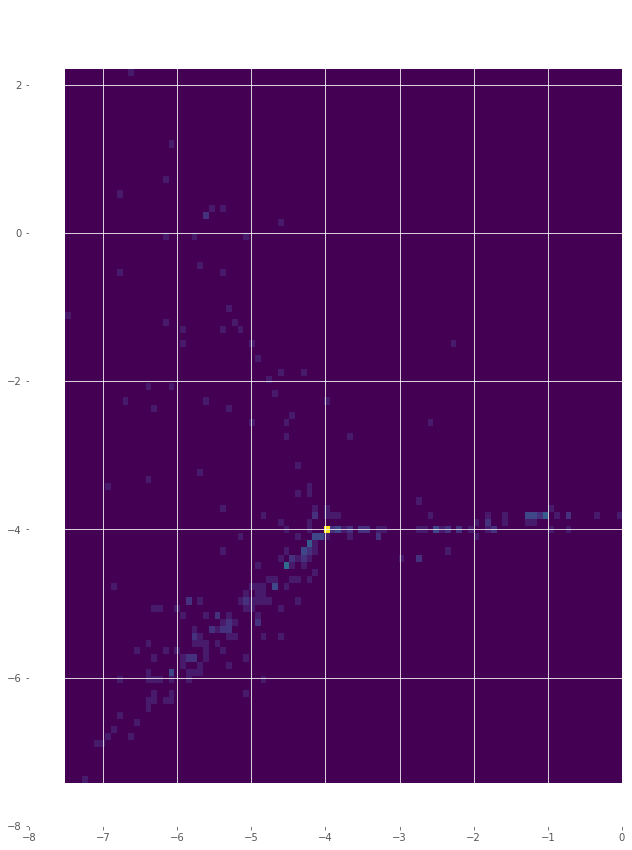

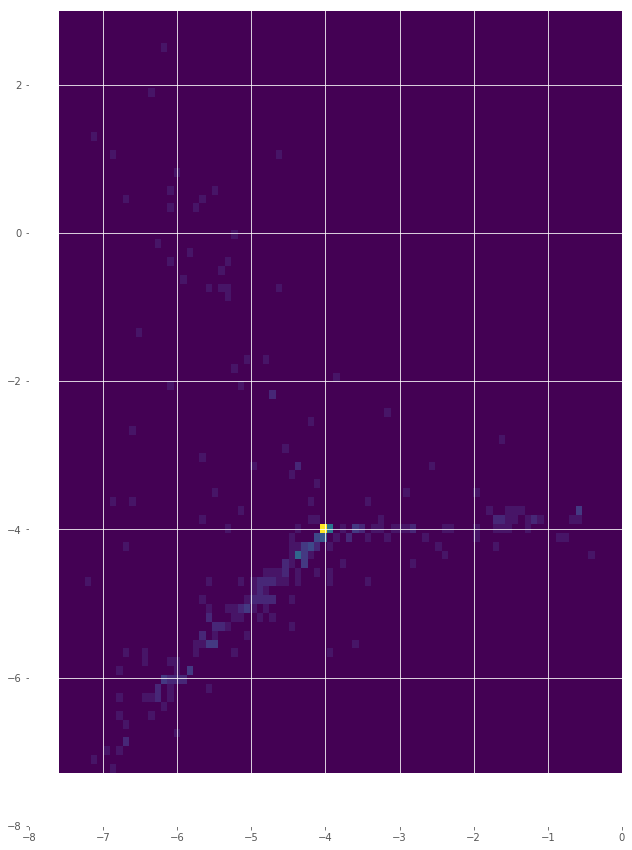

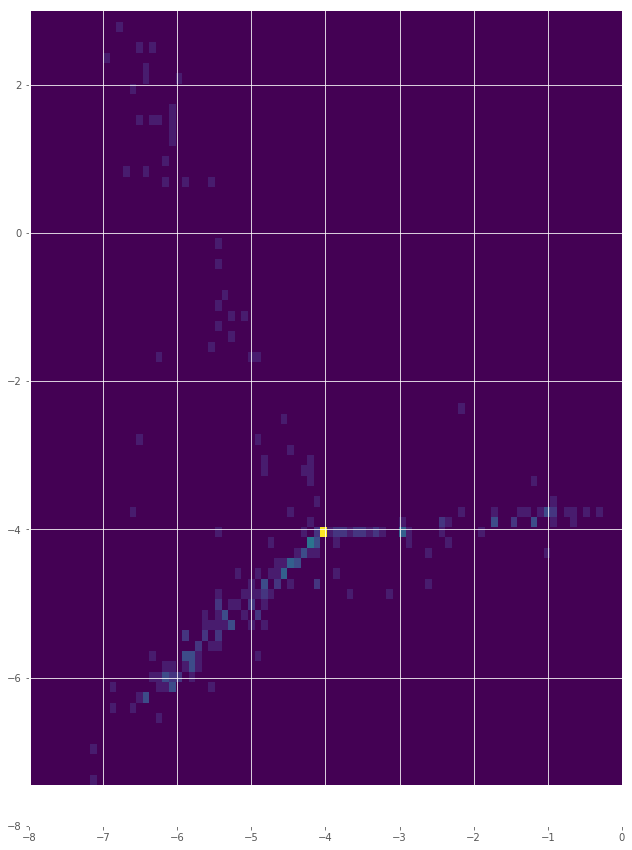

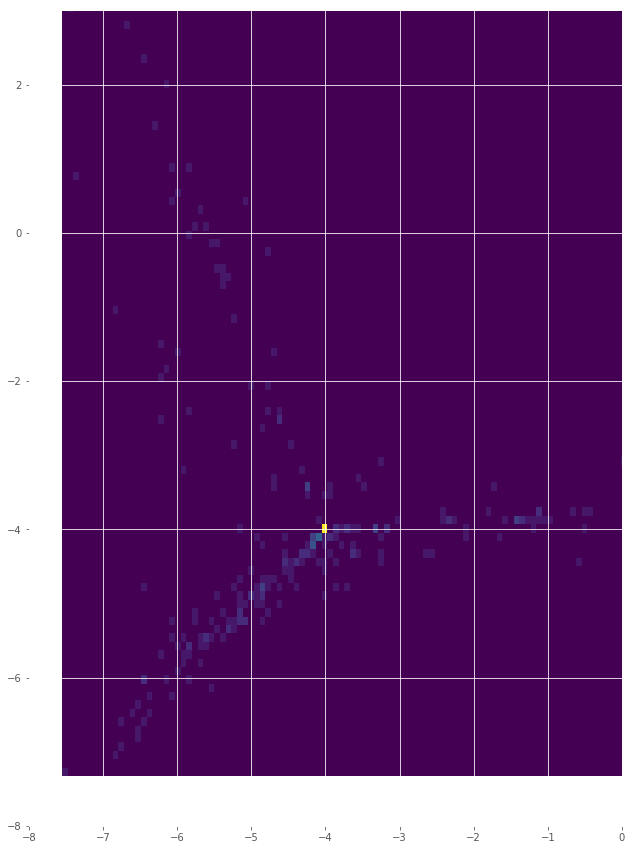

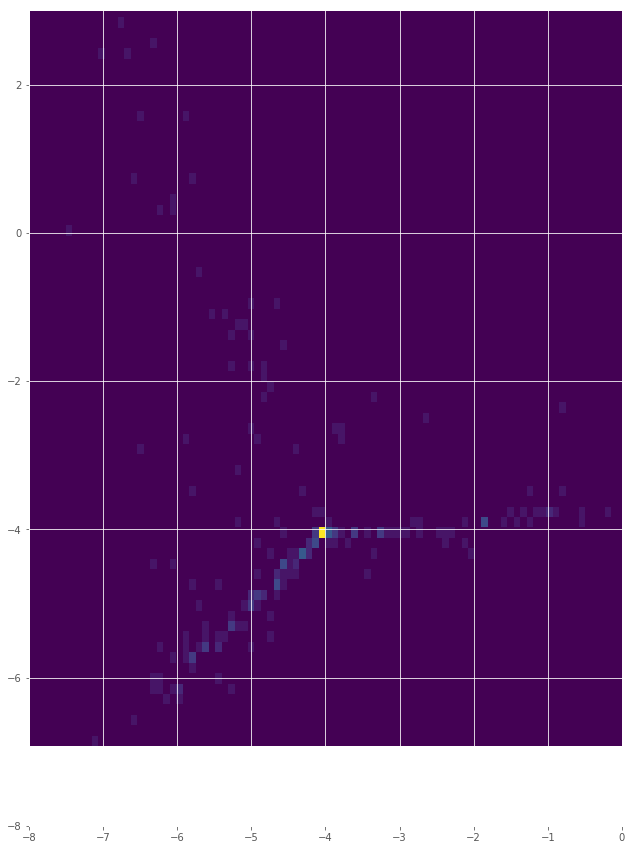

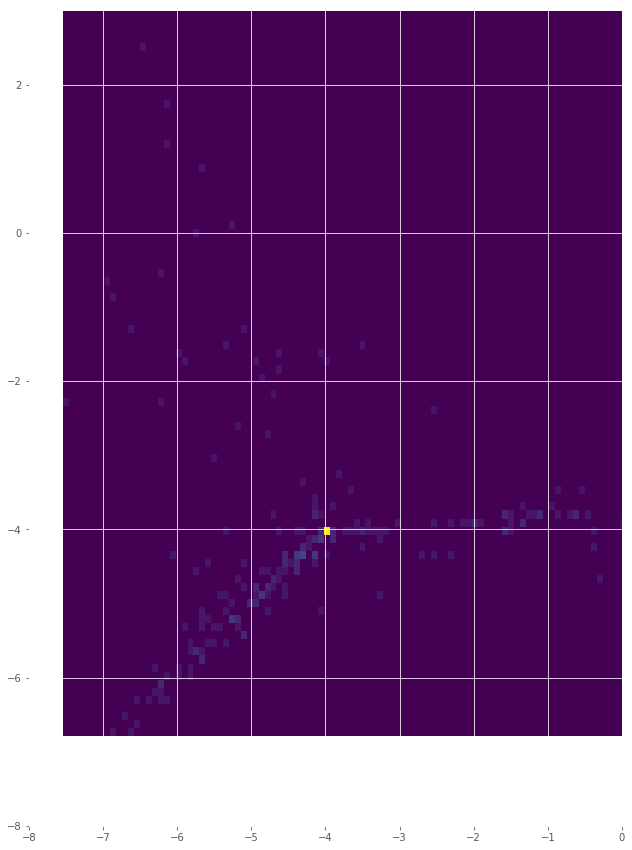

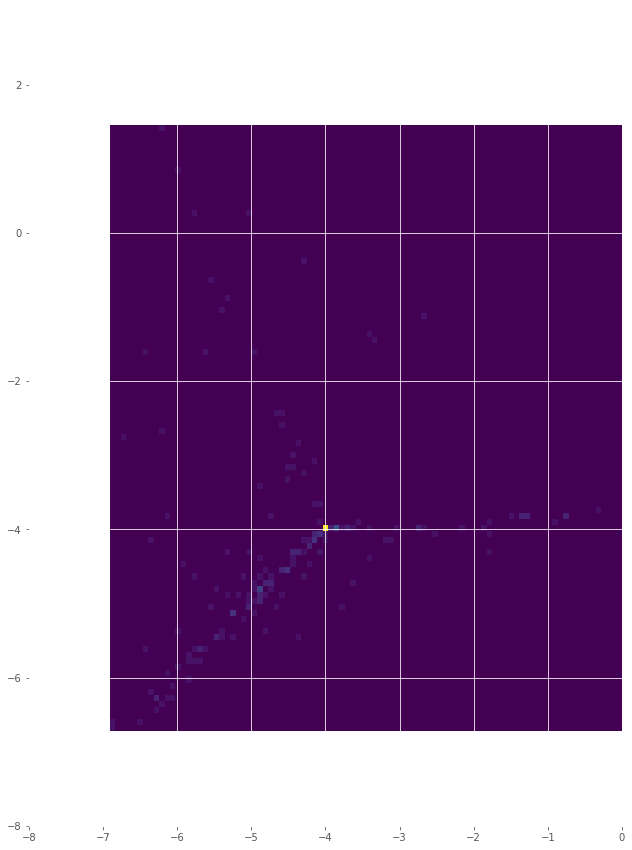

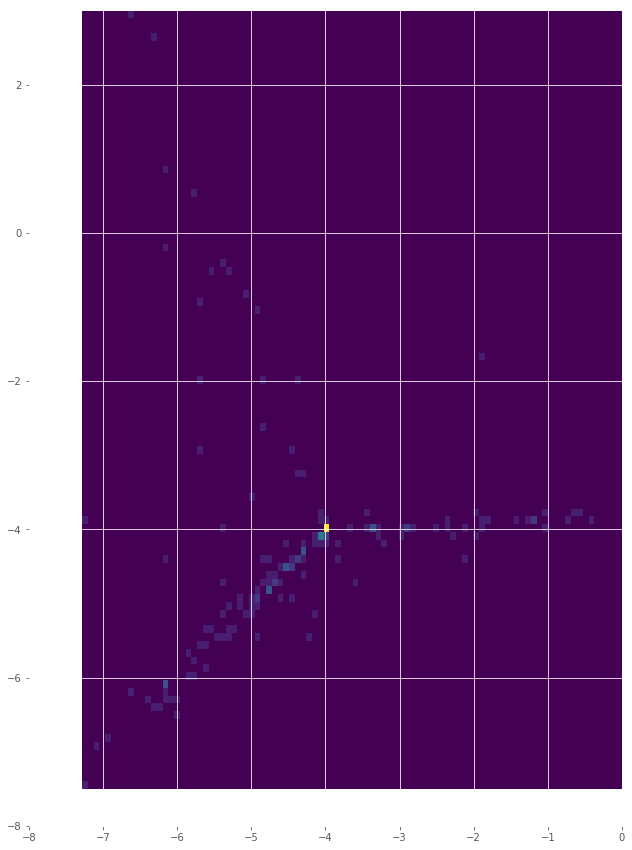

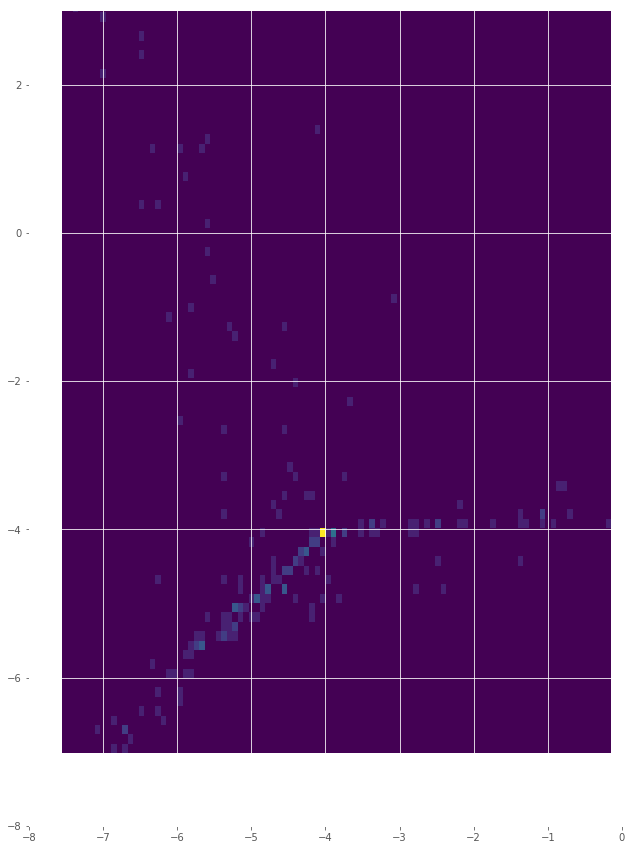

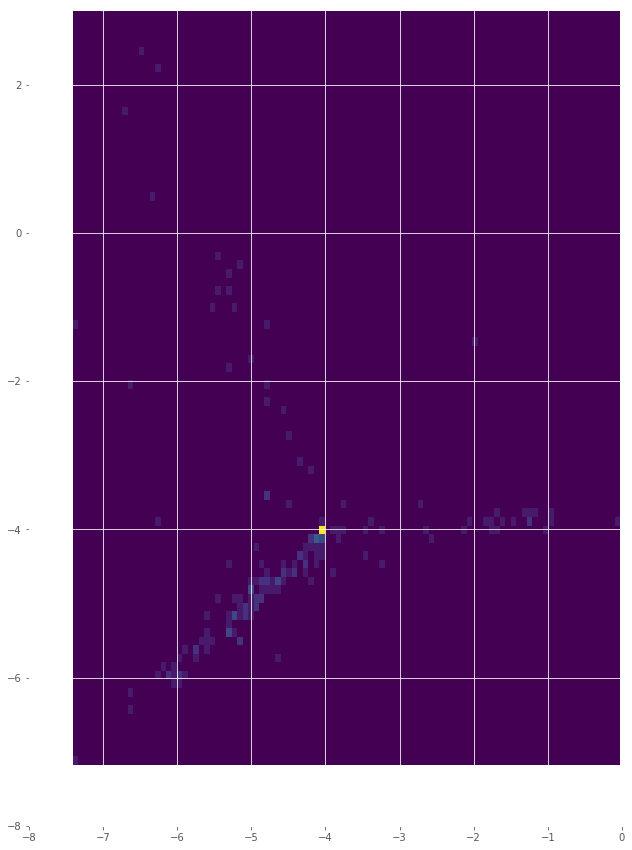

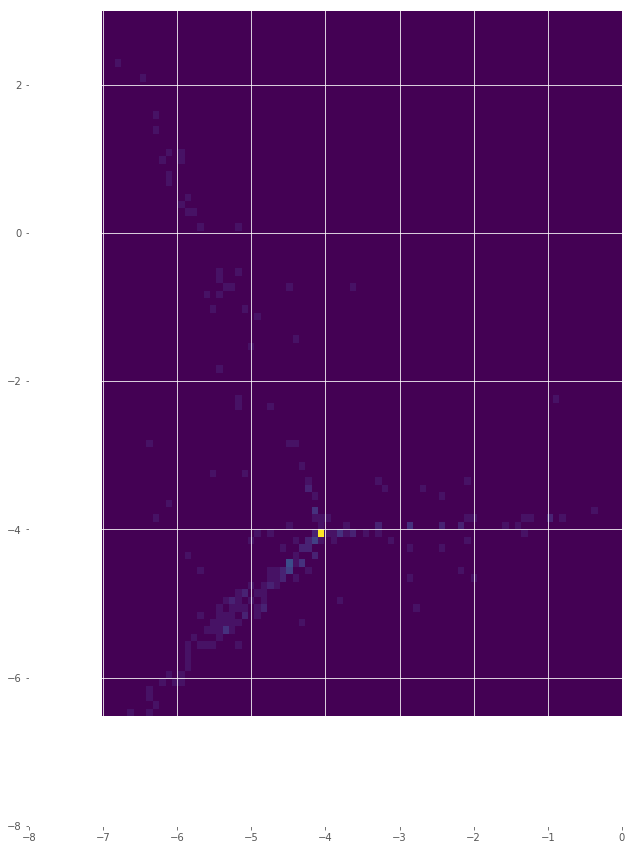

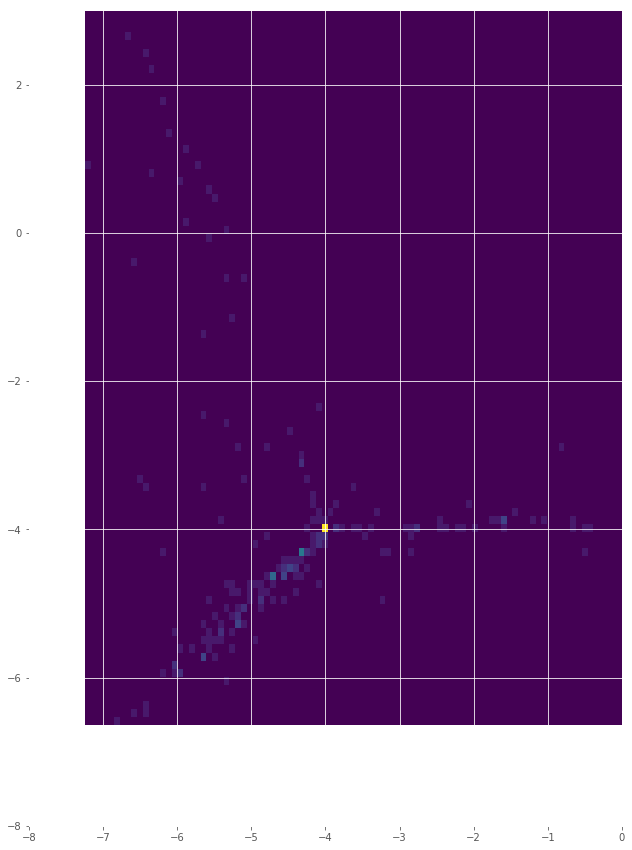

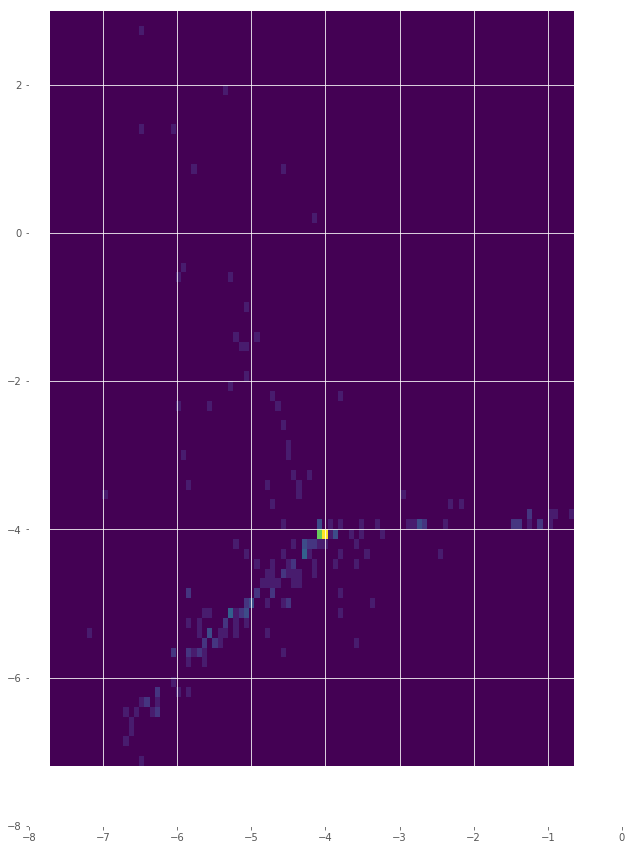

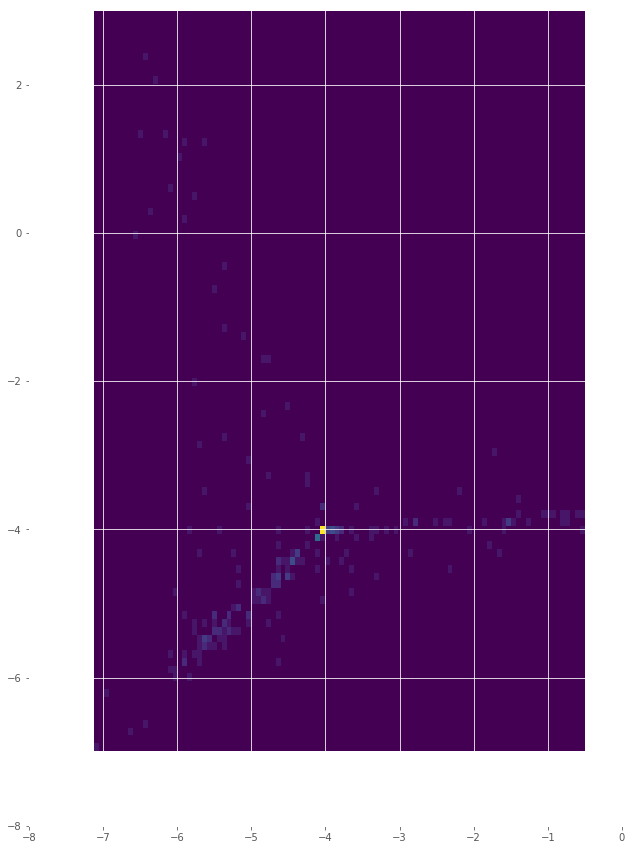

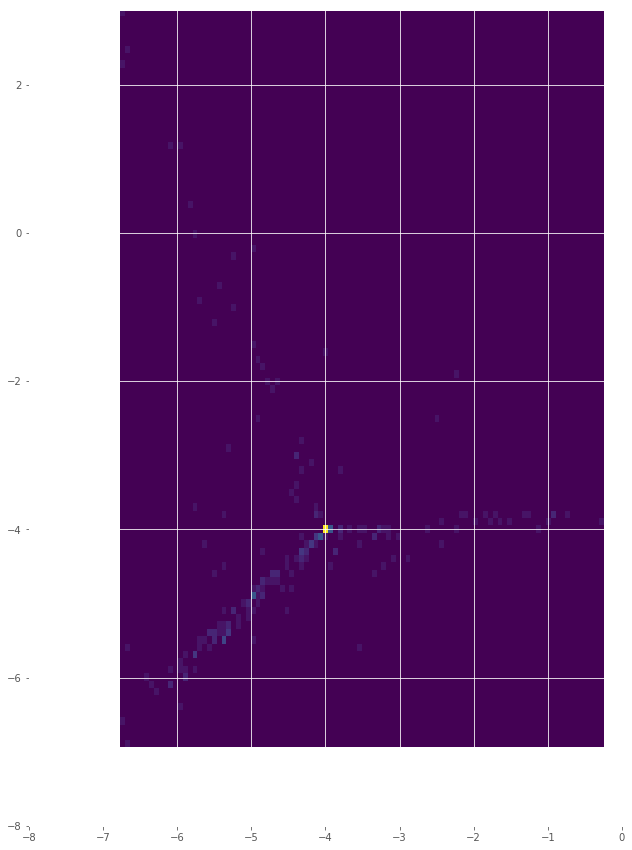

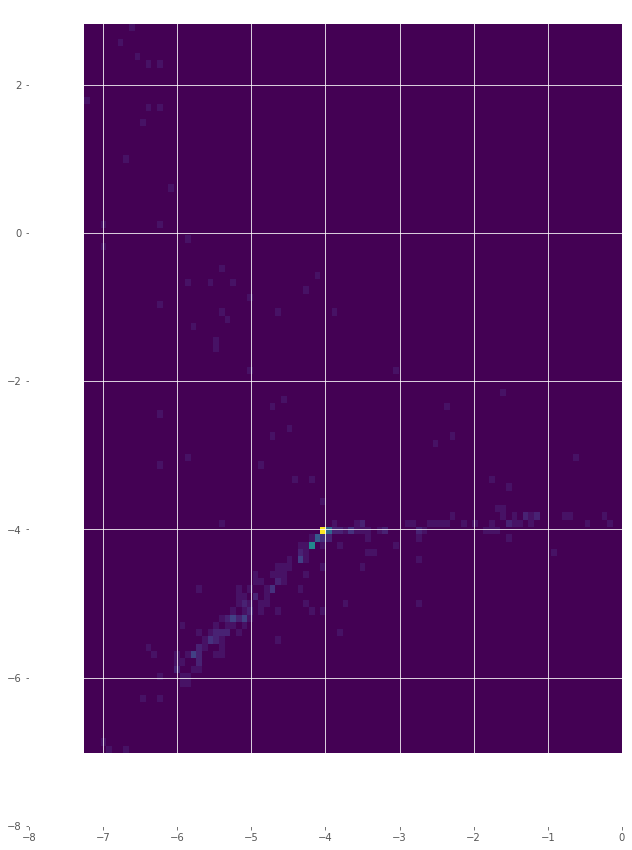

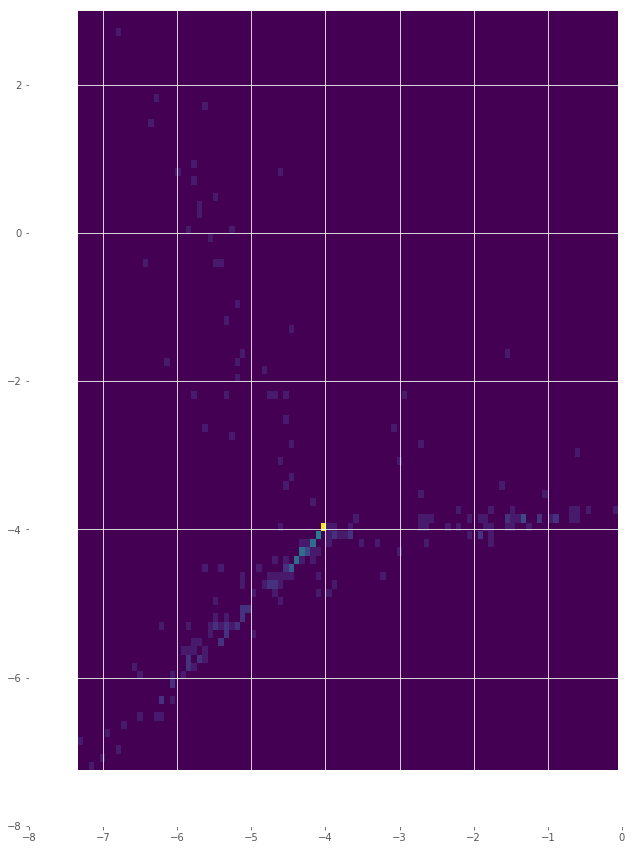

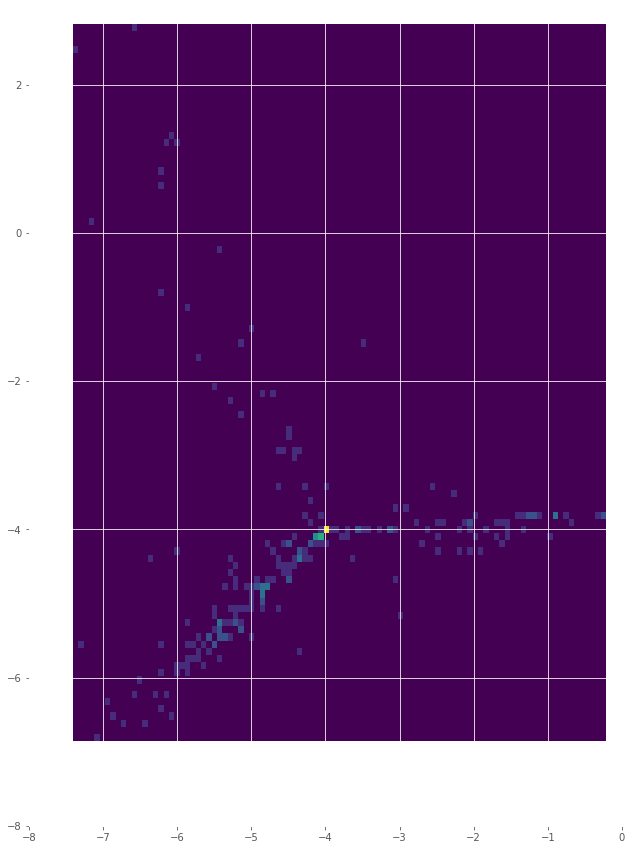

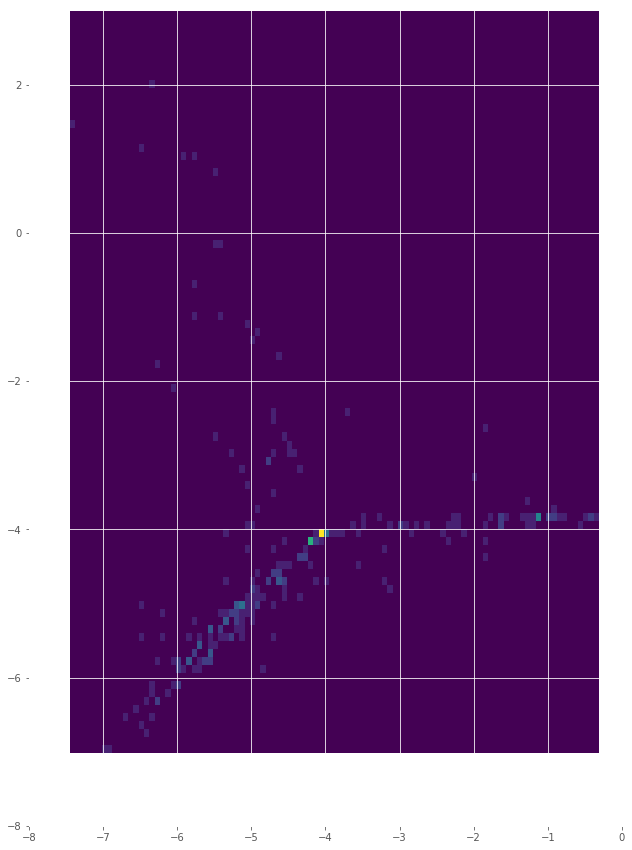

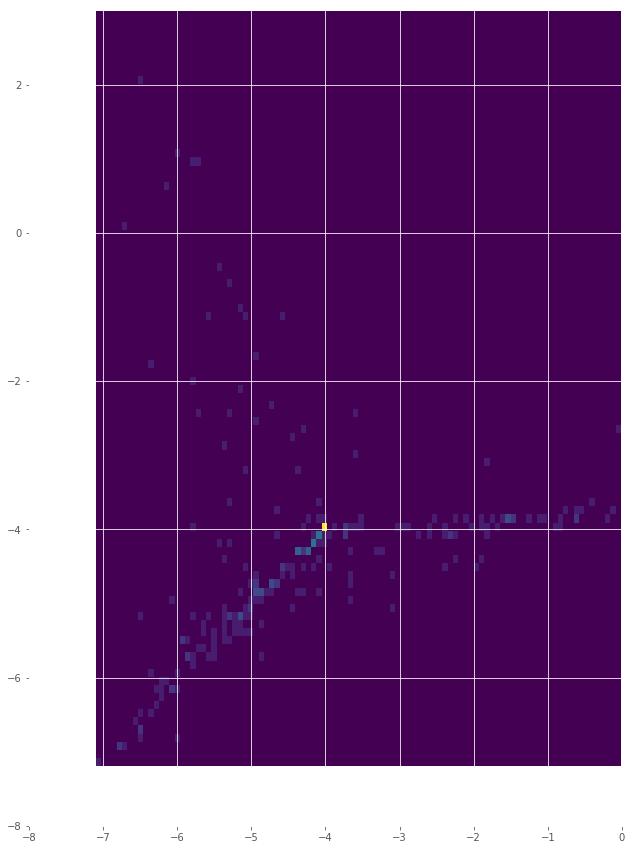

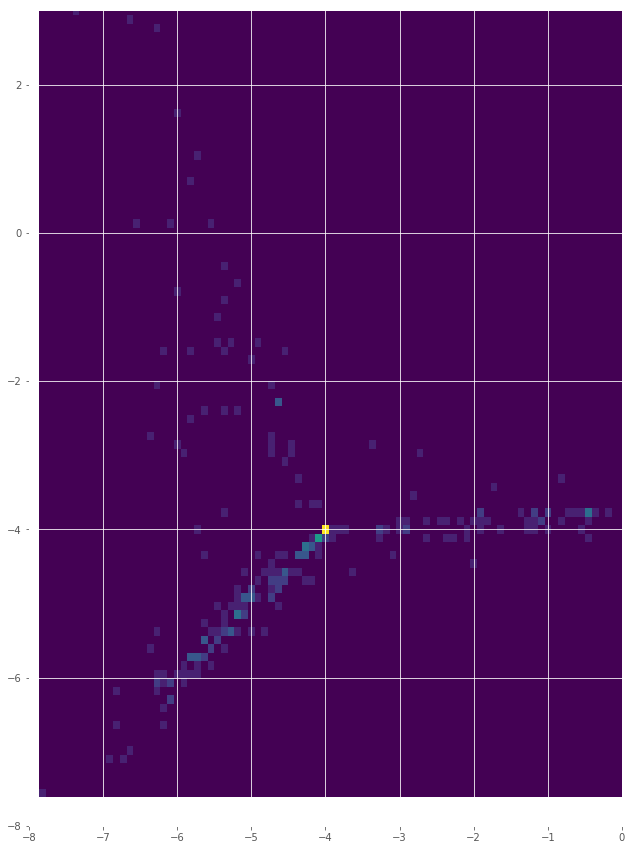

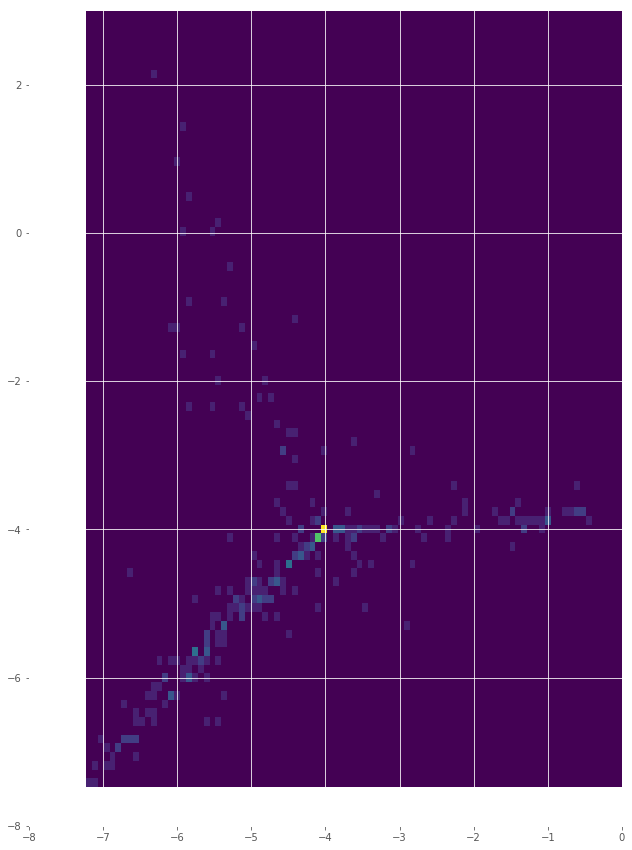

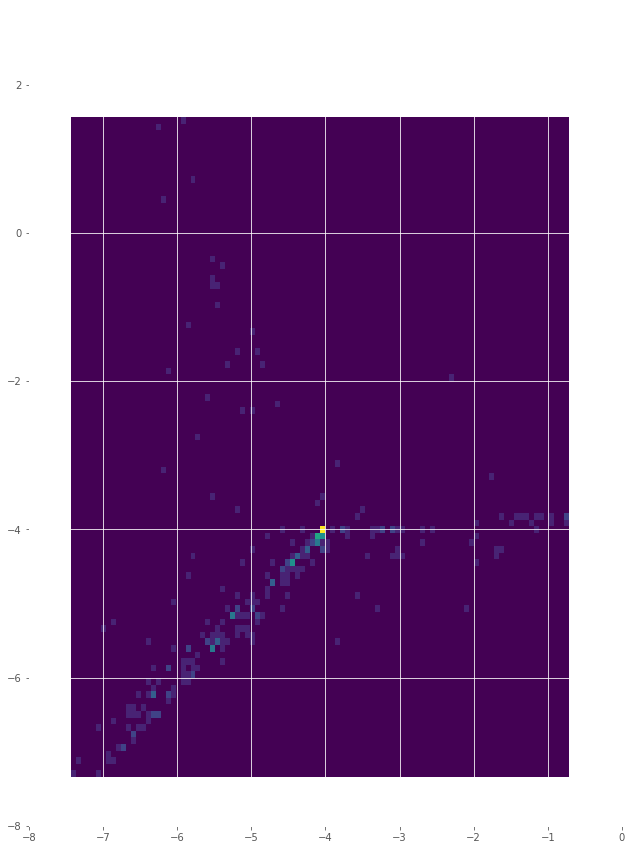

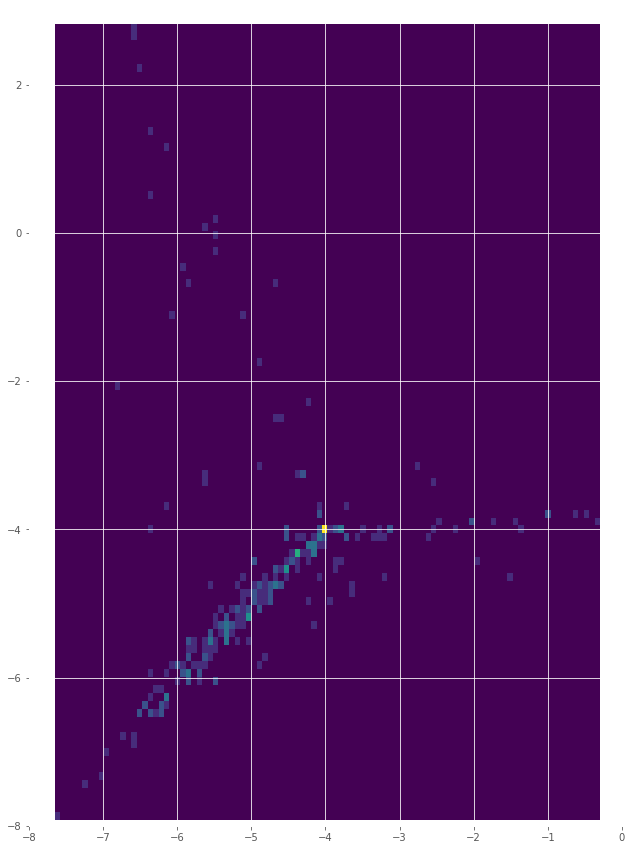

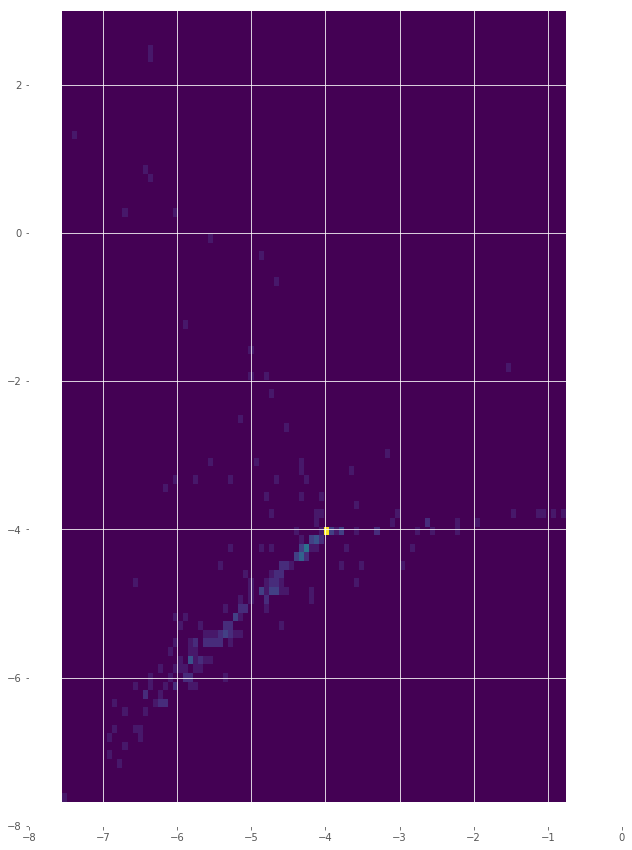

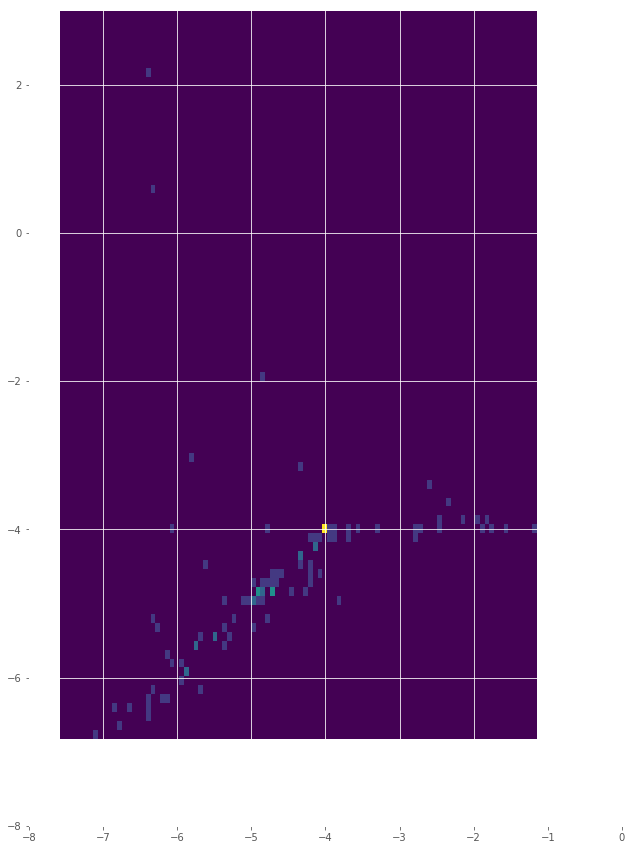

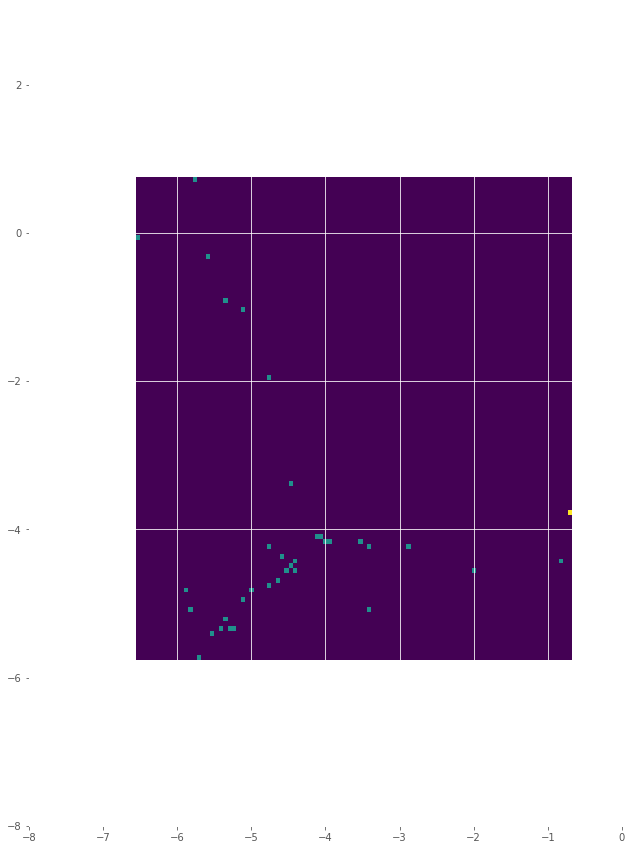

In [19]:
for y in range(1970,2015):
    heatmap_(y)

In [ ]:
import seaborn as sns

In [ ]:
raw_data.year.describe()

In [ ]:
year = 1980
indices = raw_data.year.isin([year])
indices = [i for i,boo in enumerate(indices) if boo]
X_tmp = X_fischerLDA[[indices]]
x = X_tmp[:,0]
y = X_tmp[:,1]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select,poly_select, hover, undo, redo"
p = figure(tools=TOOLS, plot_width=700, plot_height=700, min_border=10, min_border_left=50,
               toolbar_location="above", x_axis_location=None, y_axis_location=None,
          x_range=[0,10], y_range=[0,10])
p.image([heatmap.T], x, y, dw=[10], dh=[10], palette="Spectral11")
show(p)
#p = figure(x_range=[0, 10], y_range=[0, 10])
#p.image(image=[d], x=[0], y=[0], dw=[10], dh=[10], palette="Spectral11")
#plt.clf()
#plt.imshow(heatmap.T, extent=extent, origin='lower')
#plt.show()